<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/TransformerDecoderArchitecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transformer Architecture-**

We have encoder and decoder blocks in the transformer.

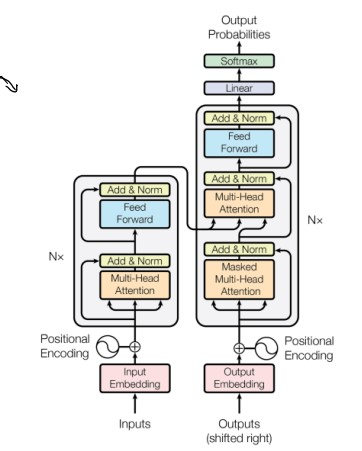

We can split the above transformer architecture as one box wherein encoder and decoder block is there.Then in that each encoder and decoder block , there are 6 similar encoder and decoder blocks are present.

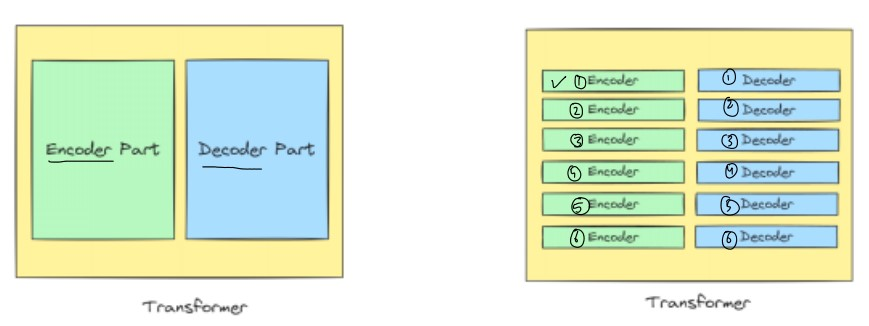

In each decoder block , we have 3 blocks as maskd self attention block , cross attention block and feed forward neural network block.We have total of 6 such combination of these 3 blocks.

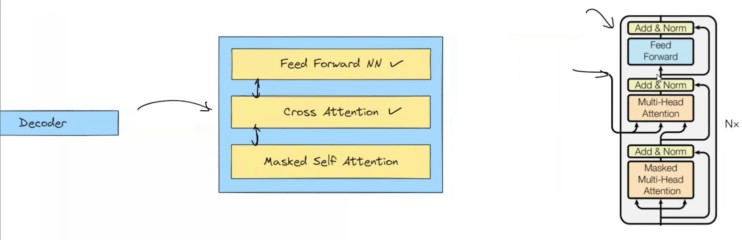

**Architecture Decoder Architecture-**

Let we have machine translation task of conversion of english to hindi. And we are dealing the decoder architecture in training time of the model.We give input english sentence to the encoder part of the transformer. Encoder block gives the contextual word embeddings of each word in form of vector as an output.There are 4 operations that happens in decoder part of the transformer and those are - 1)Shifting 2)Tokenization 3)Embeddings 4)Posiotional Encoding


Let the input sentence we have is "We are friends" and its translation as "Hum dost hai".This english sentence is given to the encoder block which creates contextual word embeddings of each word in the sentence as output of encoder block.IN decoder block , we perform right shifting operation wherein we add word "start" at the start of the hindi translated word as "start Hum dost hai" which starts the training.Then we perform tokenization process which breaks down sentence into unit words.We get 4 different tokens as start , hum , dost , hai . Then we perform embedding process because model dont understand the hindi words and in some way or another we will have to convert this hindi words into numbers or vectors so we have embedding layer in decoder of transformer to do this.We will get the 4 different vectors of embedding of each word in sentence with 512 dimentions.We havent stored the information of which word came first and which came later and the context of word in which it has been used in the sentence.To store this information , we use positional encoding technique.This technique generates the vector according to the different positions and those created vectors will be of 512 dimensions.NOw we will add the word embedding vector with the positional embedding vector to get the final input vectors x1 , x2, x3 and x4 for each word which is going to be fed to the decoder block.

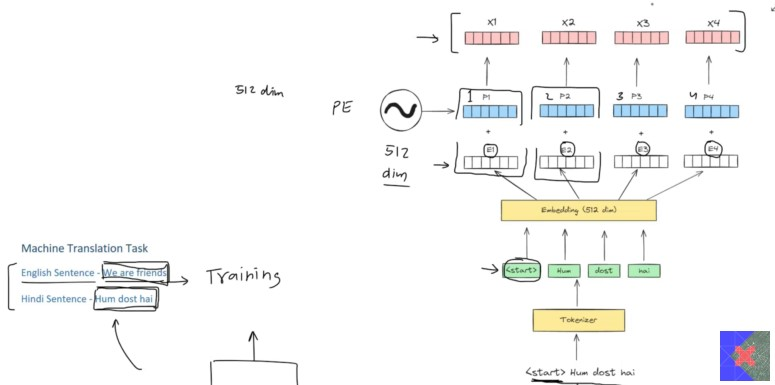


**1st Decoder Block -**

We perform masked multihead attention , cross attention and application f feed formward neural network. We have 4 vectors ready for each word as x1 , x2 , x3  and x4.These 4 vectors are given to the masked multihead attention block.Each x(1,2,3 & 4) vector one contextual word embedding vector will be generated just the differnce is that when we generate contextual word embeddings of word "start" then we dont consider the future words. Similarly when we generate contextual word embeddings of "hum" then we dont consider the future words like "dost" and "hai".Now we will add the output of masked multihead attention to the x(1,2,3 and 4) vectors.After addition we will get the z1',z2',z3' and z4'.These z vectors are passed through the layer normalization block which gives us the normalized z1norm , z2norm , z3norm and z4norm.Due to the normalization of the vectors , the values will be in the same range.

NOw we have cross attention block which is the most interesting bloxck in decoder architecture of transformer.For each token that is resent in the english input sentence , we find out a similarity score with each sentence that is resent in the output sentence of hindi.In Cross attention block , we pass two sequnce of english as well as hindi sentence.We will extract query vectors from z1norm , z2norm , z3norm and z4norm and we will extract key and value vectors from the encoder.Output of cross attention will be contextual word embedding vector of each word as zc1 , zc2, zc3 and zc4.


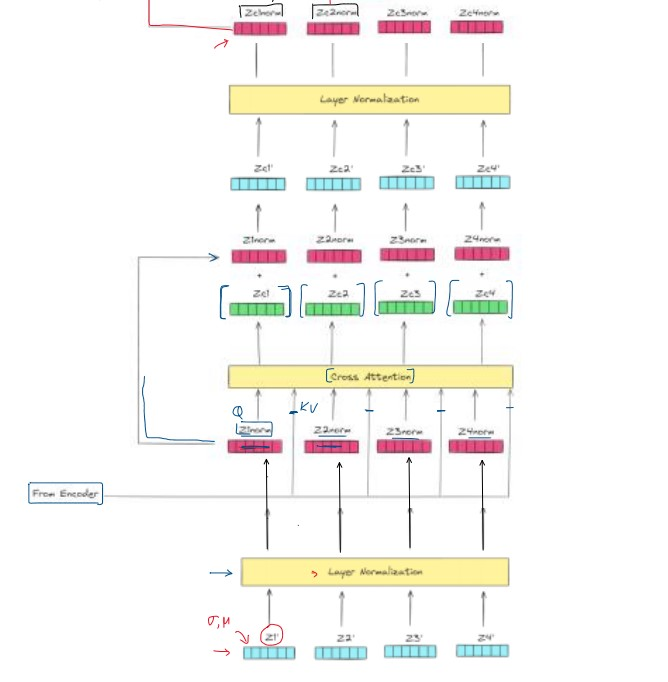

Now we have feed forward block in decoder architexture.This is the same architecture that we saw in encoder block.There are 2 layers with each having 2048 neurons and 512 neurons in 1st and 2nd layers.1st layer has relu and 2nd layer has linear activation function.w1,b1,w2 and b2 is shown in fig. We will create a matrix of 4 * 512 dimenstions from zc1norm,zc2norm,zc3norm and zc4norm and fed it to the feed forward neural network.We have relu activation function to capture the non-linearity present in the data which is also the purpose to introduce the feed forward neural network in decoder architecture of the transformer.Output of the neural network is 4 vectors of size 4 * 512 with the capabilit of capturing the non-linearity in the data.

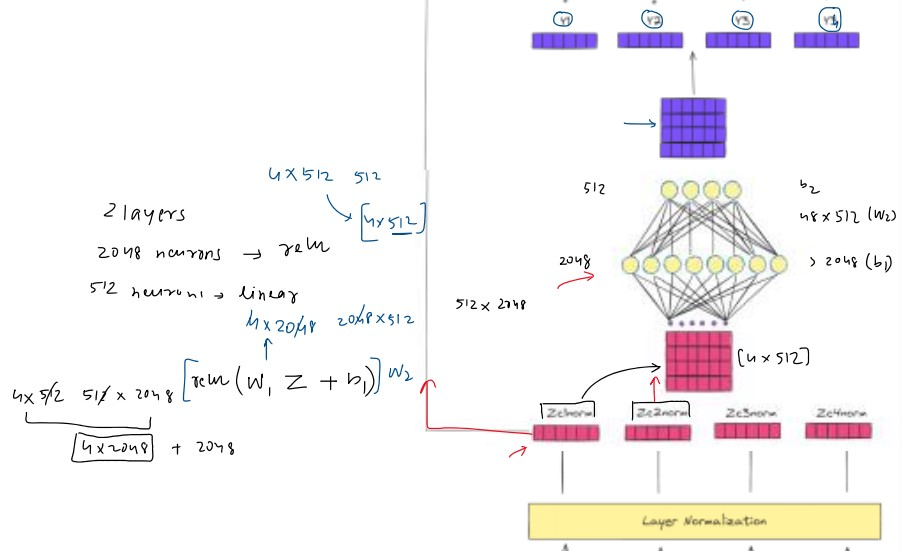

We perform addition of zc vectors with the output vectors of feed forward neural network to get the y1',y2',y3' and y4'.We perform the layer normalization process on these y(1',2',3' & 4') vectors to get y1norm , y2norm , y3norm and y4norm vectors.These 4 normalized vector are the output of decoder achitecture of 1 block. Such we have 6 decoder blocks.We directly pass these ynorm vectors to the next decoder block and all the process will happen similarly the way it happend in 1st decoder block. We will get the final output of 6th decoder block which is 4 different normalized vectors for each token of start,hum,dost and hai of size 1 * 512.This vector is passed through the neural network.We will apply softmax activation function and get the probability value for each word of hindi present in the training dataset.If the highest prbability got is for hum word , then we will print the "hum" word as output.

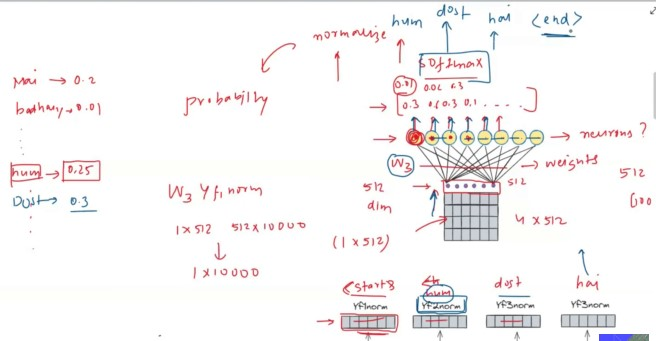

